<a href="https://colab.research.google.com/github/Vishnu-MLOps/BraTS2020_Segmentation_Task/blob/main/Retinal_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/retinal-disease-classification")

print("Path to dataset files:", path)


100%|██████████| 7.43G/7.43G [06:02<00:00, 22.0MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1


In [2]:
!ls '/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1'

Evaluation_Set	Test_Set  Training_Set


In [3]:
!ls '/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Evaluation_Set/Evaluation_Set/Validation'

100.png  154.png  207.png  260.png  313.png  367.png  41.png   473.png	526.png  57.png   632.png
101.png  155.png  208.png  261.png  314.png  368.png  420.png  474.png	527.png  580.png  633.png
102.png  156.png  209.png  262.png  315.png  369.png  421.png  475.png	528.png  581.png  634.png
103.png  157.png  20.png   263.png  316.png  36.png   422.png  476.png	529.png  582.png  635.png
104.png  158.png  210.png  264.png  317.png  370.png  423.png  477.png	52.png	 583.png  636.png
105.png  159.png  211.png  265.png  318.png  371.png  424.png  478.png	530.png  584.png  637.png
106.png  15.png   212.png  266.png  319.png  372.png  425.png  479.png	531.png  585.png  638.png
107.png  160.png  213.png  267.png  31.png   373.png  426.png  47.png	532.png  586.png  639.png
108.png  161.png  214.png  268.png  320.png  374.png  427.png  480.png	533.png  587.png  63.png
109.png  162.png  215.png  269.png  321.png  375.png  428.png  481.png	534.png  588.png  640.png
10.png	 163.png  216.png  26.png 

In [4]:
#Training
#Number of training images: 1920

import os

train_labels_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set', 'RFMiD_Training_Labels.csv')
train_images_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training')

#Testing
#Number of testing images: 640
test_labels_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Test_Set/Test_Set', 'RFMiD_Testing_Labels.csv')
test_images_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Test_Set/Test_Set', 'Test')

#Validation
#Number of validation images: 640
validation_labels_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Evaluation_Set/Evaluation_Set', 'RFMiD_Validation_Labels.csv')
validation_images_path = os.path.join('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Evaluation_Set/Evaluation_Set', 'Validation')

# 1920 + 640 + 640 = 3200 fundus images
# 46 conditions annotated
# .png image files
# .csv labels

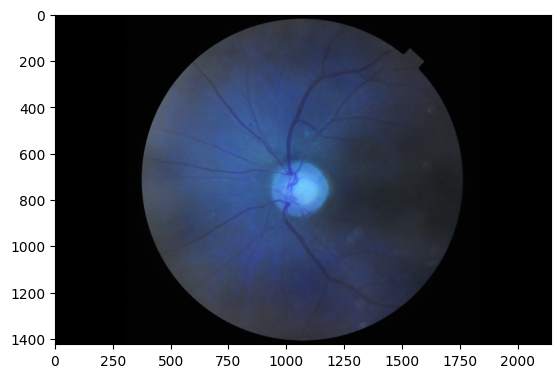

In [5]:
import cv2 as cv2
import matplotlib.pyplot as plt

img = cv2.imread('/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/1000.png')
plt.imshow(img)

In [6]:
import pandas as pd

train_labels = pd.read_csv(train_labels_path)
test_labels = pd.read_csv(test_labels_path)
validation_labels = pd.read_csv(validation_labels_path)



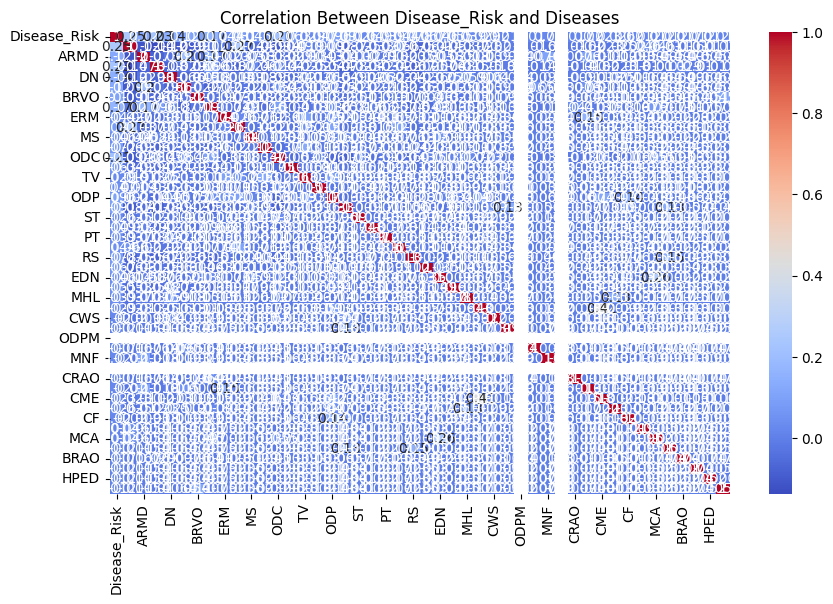

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = train_labels.iloc[:, 1:].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.title("Correlation Between Disease_Risk and Diseases")
plt.show()


In [8]:
import glob

train_images = glob.glob(train_images_path + '/*png')
test_images = glob.glob(test_images_path + '/*png')
validation_images = glob.glob(validation_images_path + '/*png')

In [9]:
row1 = train_labels.iloc[0]
diseases = row1.index[row1==1].tolist()[2:]
diseases

['DR']

In [10]:
for i in range(5):
  print(train_images[i] + '\n')

/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/491.png

/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/1503.png

/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/494.png

/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/751.png

/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/1198.png



Text(0.5, 1.0, "['DR']")

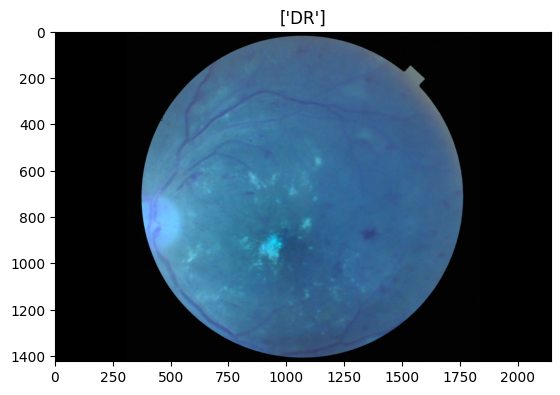

In [11]:
idx = 0
row1 = train_labels.iloc[0]
diseases = row1.index[row1==1].tolist()[2:]

img_1 = f'/root/.cache/kagglehub/datasets/andrewmvd/retinal-disease-classification/versions/1/Training_Set/Training_Set/Training/{idx+1}.png'
img_1 = cv2.imread(img_1)
plt.imshow(img_1)
plt.title(diseases)

In [12]:
print(train_labels.iloc[0]["ID"])


1


In [13]:
print(train_labels.value_counts())
len(train_images)

ID    Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  LS  MS  CSR  ODC  CRVO  TV  AH  ODP  ODE  ST  AION  PT  RT  RS  CRS  EDN  RPEC  MHL  RP  CWS  CB  ODPM  PRH  MNF  HR  CRAO  TD  CME  PTCR  CF  VH  MCA  VS  BRAO  PLQ  HPED  CL
1881  0             0   0     0   0   0    0     0     0    0   0   0    0    0     0   0   0    0    0   0     0   0   0   0    0    0     0    0   0    0   0     0    0    0   0     0   0    0     0   0   0    0   0     0    0     0     1
1882  0             0   0     0   0   0    0     0     0    0   0   0    0    0     0   0   0    0    0   0     0   0   0   0    0    0     0    0   0    0   0     0    0    0   0     0   0    0     0   0   0    0   0     0    0     0     1
1883  0             0   0     0   0   0    0     0     0    0   0   0    0    0     0   0   0    0    0   0     0   0   0   0    0    0     0    0   0    0   0     0    0    0   0     0   0    0     0   0   0    0   0     0    0     0     1
1884  0             0   0     0   0   0  

1920

In [14]:
disease_count = train_labels.iloc[:, 2:].sum(axis=1)
more_than_1 = (disease_count > 1).sum()
more_than_1

458

In [16]:
#Training data:
#401 images with no disease
#1061 images with 1 disease
#373 images with 2 diseases
#79 images with 3 diseases
#5 images with 4 diseases
#1 image with 5 diseases
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
device

'cuda'

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from PIL import Image
class GetImageLabel(Dataset):
  def __init__(self, images, labels, train=False, test=False, validation=False):
    self.images = images
    self.labels = labels
    self.test = test
    self.train = train
    self.validation = validation
    self.transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ])

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    image = Image.open(self.images[idx]).convert('RGB')
    image = self.transform(image)
    label = torch.tensor(self.labels[idx])
    return image.float().to(device), label.float().to(device)

  def collate_fn(self, batch):
    images, labels = zip(*batch)
    images = torch.stack(images)
    labels = torch.stack(labels)
    return images, labels


In [40]:
train_ds = GetImageLabel(train_images, train_labels.iloc[:, 2:].values, train=True)
test_ds = GetImageLabel(test_images, test_labels.iloc[:, 2:].values, test=True)
validation_ds = GetImageLabel(validation_images, validation_labels.iloc[:, 2:].values, validation=True)

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True, collate_fn=train_ds.collate_fn)
test_dl = DataLoader(test_ds, batch_size=8, shuffle=False, collate_fn=test_ds.collate_fn)
validation_dl = DataLoader(validation_ds, batch_size=8, shuffle=False, collate_fn=validation_ds.collate_fn)

In [41]:
import torch.nn as nn

def get_model():
  model = torchvision.models.resnet50(pretrained=True)
  for param in model.parameters():
    param.requires_grad = False
  model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
  model.fc = nn.Sequential(
      nn.Flatten(),
      nn.Linear(2048, 1024),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(1024, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, 45)
  )
  return model.to(device)

In [42]:
import torch.optim as optim

model1 = get_model()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
def train_batch(inputs, model, optimizer, criterion):
  model.train()
  images, labels = inputs
  images.to(device)
  labels.to(device)
  optimizer.zero_grad()
  _labels = model(images)
  loss = criterion(_labels, labels)
  loss.backward()
  optimizer.step()
  return loss.item()

@torch.no_grad()
def validate_batch(inputs, model, criterion):
  model.eval()
  images, labels = inputs
  images.to(device)
  labels.to(device)
  _labels = model(images)
  loss = criterion(_labels, labels)
  return loss.item()

In [48]:
#Training Loop
from tqdm import tqdm

train_losses = []
val_losses = []

epochs = 20
for epoch in range(20):
  print(f'Epoch {epoch+1}|20')
  train_loss = 0
  for batch in tqdm(train_dl):
    loss = train_batch(batch, model1, optimizer, criterion)
    train_loss += loss
  train_loss /= len(train_dl)
  train_losses.append(train_loss)
  print(f'Training loss in epoch {epoch+1}:{train_loss}')

  val_loss = 0
  for batch in tqdm(validation_dl):
    loss = validate_batch(batch, model1, criterion)
    val_loss += loss
  val_loss /= len(validation_dl)
  val_losses.append(val_loss)
  print(f'Validation loss in epoch {epoch+1}:{val_loss}')

Epoch 1|20


100%|██████████| 120/120 [04:23<00:00,  2.20s/it]


Training loss in epoch 1:0.09015641808509826


100%|██████████| 80/80 [01:27<00:00,  1.10s/it]


Validation loss in epoch 1:0.09331118245609105
Epoch 2|20


100%|██████████| 120/120 [04:21<00:00,  2.18s/it]


Training loss in epoch 2:0.09017023934672276


100%|██████████| 80/80 [01:25<00:00,  1.06s/it]


Validation loss in epoch 2:0.09259542950894684
Epoch 3|20


100%|██████████| 120/120 [04:22<00:00,  2.19s/it]


Training loss in epoch 3:0.08948804664735993


100%|██████████| 80/80 [01:24<00:00,  1.06s/it]


Validation loss in epoch 3:0.09274430251680314
Epoch 4|20


100%|██████████| 120/120 [04:22<00:00,  2.19s/it]


Training loss in epoch 4:0.08935490405807893


100%|██████████| 80/80 [01:25<00:00,  1.07s/it]


Validation loss in epoch 4:0.09218487460166216
Epoch 5|20


100%|██████████| 120/120 [04:20<00:00,  2.17s/it]


Training loss in epoch 5:0.08929748069494962


100%|██████████| 80/80 [01:25<00:00,  1.07s/it]


Validation loss in epoch 5:0.09043618307914585
Epoch 6|20


100%|██████████| 120/120 [04:21<00:00,  2.18s/it]


Training loss in epoch 6:0.08946369684611757


100%|██████████| 80/80 [01:25<00:00,  1.07s/it]


Validation loss in epoch 6:0.09108714573085308
Epoch 7|20


100%|██████████| 120/120 [04:20<00:00,  2.17s/it]


Training loss in epoch 7:0.08952119527384639


100%|██████████| 80/80 [01:25<00:00,  1.07s/it]


Validation loss in epoch 7:0.09047033246606588
Epoch 8|20


100%|██████████| 120/120 [04:25<00:00,  2.21s/it]


Training loss in epoch 8:0.08845944783339897


100%|██████████| 80/80 [01:27<00:00,  1.10s/it]


Validation loss in epoch 8:0.09116793887224048
Epoch 9|20


100%|██████████| 120/120 [04:30<00:00,  2.25s/it]


Training loss in epoch 9:0.08903410670657953


100%|██████████| 80/80 [01:27<00:00,  1.10s/it]


Validation loss in epoch 9:0.09058678578585386
Epoch 10|20


100%|██████████| 120/120 [04:21<00:00,  2.18s/it]


Training loss in epoch 10:0.08827653005719185


100%|██████████| 80/80 [01:26<00:00,  1.08s/it]


Validation loss in epoch 10:0.09154703405220062
Epoch 11|20


100%|██████████| 120/120 [04:19<00:00,  2.16s/it]


Training loss in epoch 11:0.08776975671450298


100%|██████████| 80/80 [01:24<00:00,  1.05s/it]


Validation loss in epoch 11:0.09289979147724807
Epoch 12|20


100%|██████████| 120/120 [04:17<00:00,  2.15s/it]


Training loss in epoch 12:0.08793162213017543


100%|██████████| 80/80 [01:25<00:00,  1.06s/it]


Validation loss in epoch 12:0.09065145191270858
Epoch 13|20


100%|██████████| 120/120 [04:17<00:00,  2.15s/it]


Training loss in epoch 13:0.08809121729185183


100%|██████████| 80/80 [01:25<00:00,  1.06s/it]


Validation loss in epoch 13:0.0908061801455915
Epoch 14|20


100%|██████████| 120/120 [04:19<00:00,  2.16s/it]


Training loss in epoch 14:0.08737242929637432


100%|██████████| 80/80 [01:23<00:00,  1.05s/it]


Validation loss in epoch 14:0.09083453442435711
Epoch 15|20


100%|██████████| 120/120 [04:16<00:00,  2.13s/it]


Training loss in epoch 15:0.0872567482603093


100%|██████████| 80/80 [01:25<00:00,  1.06s/it]


Validation loss in epoch 15:0.09063828438520431
Epoch 16|20


100%|██████████| 120/120 [04:19<00:00,  2.16s/it]


Training loss in epoch 16:0.08734243058909973


100%|██████████| 80/80 [01:24<00:00,  1.06s/it]


Validation loss in epoch 16:0.0907184841344133
Epoch 17|20


100%|██████████| 120/120 [04:20<00:00,  2.17s/it]


Training loss in epoch 17:0.08708207824577888


100%|██████████| 80/80 [01:26<00:00,  1.08s/it]


Validation loss in epoch 17:0.0910500971833244
Epoch 18|20


100%|██████████| 120/120 [04:20<00:00,  2.17s/it]


Training loss in epoch 18:0.08618446219091615


100%|██████████| 80/80 [01:23<00:00,  1.05s/it]


Validation loss in epoch 18:0.09115008367225527
Epoch 19|20


100%|██████████| 120/120 [04:18<00:00,  2.15s/it]


Training loss in epoch 19:0.08604196573918065


100%|██████████| 80/80 [01:24<00:00,  1.06s/it]


Validation loss in epoch 19:0.09255454707890749
Epoch 20|20


100%|██████████| 120/120 [04:16<00:00,  2.14s/it]


Training loss in epoch 20:0.0863926867643992


100%|██████████| 80/80 [01:24<00:00,  1.06s/it]

Validation loss in epoch 20:0.09151440989226103


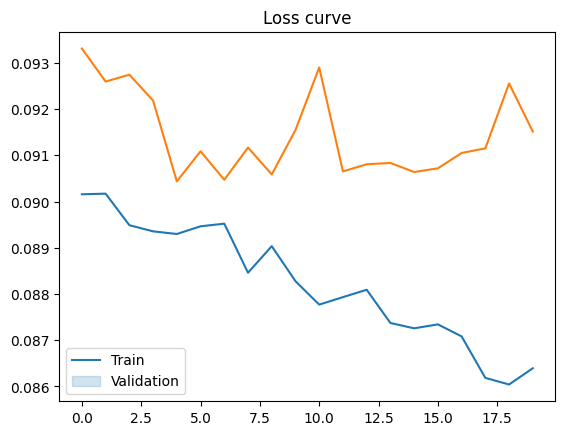

In [49]:
import seaborn as sns

plt.title('Loss curve')
sns.lineplot(x=range(epochs), y=train_losses)
sns.lineplot(x=range(epochs), y=val_losses)
plt.legend(['Train', 'Validation'])
plt.show()

In [51]:
accuracies = []

for batch in test_dl:
  image, label = batch
  prediction = model1(image)
  probs = torch.sigmoid(prediction)
  preds = (probs > 0.3).float()
  accuracy = (preds == label).float().mean()
  accuracies.append(accuracy.item())

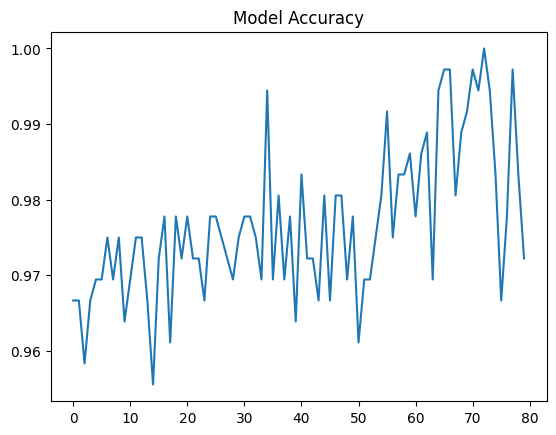

In [52]:
plt.title('Model Accuracy')
sns.lineplot(x=range(len(accuracies)), y=accuracies)
plt.show()